In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv("../input/health-insurance/states.csv")
data.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [77]:
data.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

In [78]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [6]:
a1=data.copy()
a1['State']=data['State'].str.strip()

# Uninsured Rate (2010)
a1['Uninsured Rate (2010)']=data['Uninsured Rate (2010)'].str.strip("%").astype(float)

# Uninsured Rate (2015)
a1['Uninsured Rate (2015)']=data['Uninsured Rate (2015)'].str.strip("%").astype(float)

# Uninsured Rate Change (2010-2015) 
a1['Uninsured Rate Change (2010-2015)']=data['Uninsured Rate Change (2010-2015)'].str.strip("% ")
a1['Uninsured Rate Change (2010-2015)']=data['Uninsured Rate Change (2010-2015)'].str.replace('%', ' ')
a1['Uninsured Rate Change (2010-2015)']=a1['Uninsured Rate Change (2010-2015)'].astype(float)

# Average Monthly Tax Credit (2016)
a1['Average Monthly Tax Credit (2016)']=data['Average Monthly Tax Credit (2016)'].str.strip("$").astype(float)

# State Medicaid Expansion (2016)
a1['State Medicaid Expansion (2016)']=data['State Medicaid Expansion (2016)']

# Medicaid Enrollment (2013) & Medicaid Enrollment (2016)
a1['Medicaid Enrollment (2013)']=data['Medicaid Enrollment (2013)'].astype(float)
a1['Medicaid Enrollment (2016)']=data['Medicaid Enrollment (2016)'].astype(float)

a1.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,False,799176.0,910775.0,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,True,122334.0,166625.0,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,True,1201770.0,1716198.0,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,True,556851.0,920194.0,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081.0,4087700.0,5829777


In [20]:
a1.describe()

,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
count,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,5.000000e+01,5.200000e+01,5.000000e+01,5.200000e+01
mean,14.180769,8.734615,-5.211538,7.479423e+05,6.626615e+06,4.262050e+05,3.611388e+05,292.134615,2.255699e+06,2.828190e+06,6.442463e+05,2.173923e+06
std,4.164087,3.142678,2.649429,2.691466e+06,2.370240e+07,1.538234e+06,1.306590e+06,85.153386,7.945644e+06,1.017933e+07,2.306655e+06,7.855834e+06
min,4.400000,2.800000,-10.300000,1.500000e+04,3.350000e+05,1.331300e+04,1.224000e+03,178.000000,6.751800e+04,6.358300e+04,-3.935000e+03,8.896600e+04
25%,11.250000,6.250000,-6.600000,9.725000e+04,8.797500e+05,5.109700e+04,4.371700e+04,249.500000,2.897750e+05,3.091128e+05,5.397900e+04,3.208870e+05
50%,14.300000,8.650000,-4.900000,2.245000e+05,2.305500e+06,1.306725e+05,9.817550e+04,291.000000,7.946135e+05,9.780525e+05,2.341560e+05,8.187530e+05
75%,17.350000,10.900000,-3.875000,4.122500e+05,4.386500e+06,2.260822e+05,1.936845e+05,310.500000,1.274017e+06,1.732724e+06,4.562492e+05,1.298255e+06
max,23.700000,17.100000,6.100000,1.930400e+07,1.722920e+08,1.108133e+07,9.389609e+06,750.000000,5.639248e+07,7.353293e+07,1.610616e+07,5.714998e+07


In [7]:
a1['State Medicaid Expansion (2016)'].value_counts()

True     32
False    19
Name: State Medicaid Expansion (2016), dtype: int64

In [8]:
a1.isna().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

In [9]:
a1['State Medicaid Expansion (2016)'].replace(np.nan,'True', inplace = True )

In [10]:
a1['Medicaid Enrollment (2013)'].mean() 

2255699.08

In [11]:
a1['Medicaid Enrollment (2013)'].replace(np.nan,2255699.08, inplace = True )

In [12]:
a1['Medicaid Enrollment Change (2013-2016)'].mean()

644246.28

In [14]:
a1['Medicaid Enrollment Change (2013-2016)'].replace(np.nan,644246.28, inplace = True )

In [16]:
a1['State Medicaid Expansion (2016)'].replace('True', 1, inplace = True)
a1['State Medicaid Expansion (2016)'].replace('False', 1, inplace = True)

In [17]:
a1.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Employer Health Insurance Coverage (2015)', ylabel='State'>

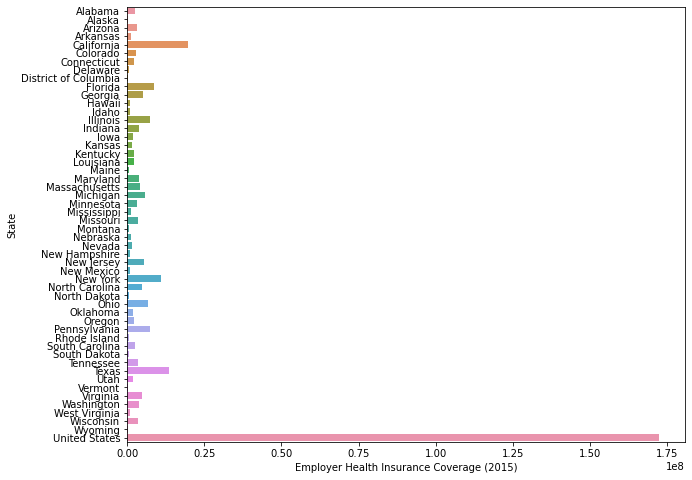

In [20]:
plt.figure(figsize = (10, 8))
sns.barplot('Employer Health Insurance Coverage (2015)','State', data = a1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Uninsured Rate Change (2010-2015)', ylabel='State'>

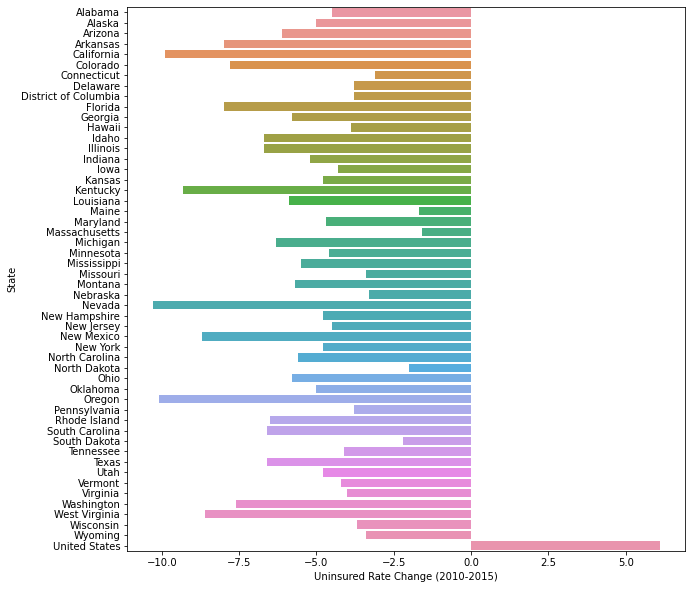

In [21]:
plt.figure(figsize = (10, 10))
sns.barplot('Uninsured Rate Change (2010-2015)', 'State', data = a1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Employer Health Insurance Coverage (2015)', ylabel='State'>

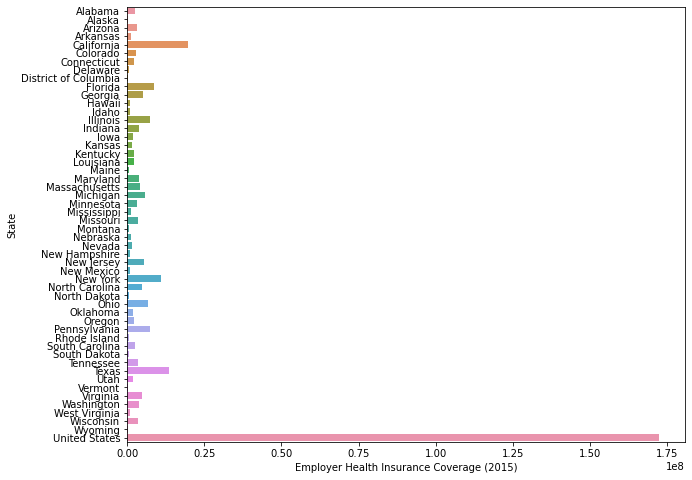

In [22]:
plt.figure(figsize = (10, 8))
sns.barplot('Employer Health Insurance Coverage (2015)','State', data = a1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Medicaid Enrollment (2016)', ylabel='Medicare Enrollment (2016)'>

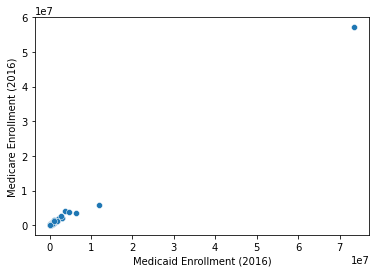

In [23]:
sns.scatterplot('Medicaid Enrollment (2016)','Medicare Enrollment (2016)', data = a1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 5000000.0)]

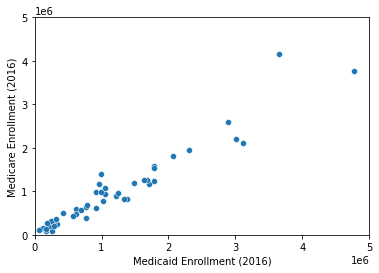

In [24]:
a_plot = sns.scatterplot('Medicaid Enrollment (2016)','Medicare Enrollment (2016)', data = a1)
a_plot.set(xlim=(0, 5000000))
a_plot.set(ylim=(0, 5000000))